In [2]:
import pandas as pd
df = pd.read_csv("data/data_cleared_barcelona2.csv")

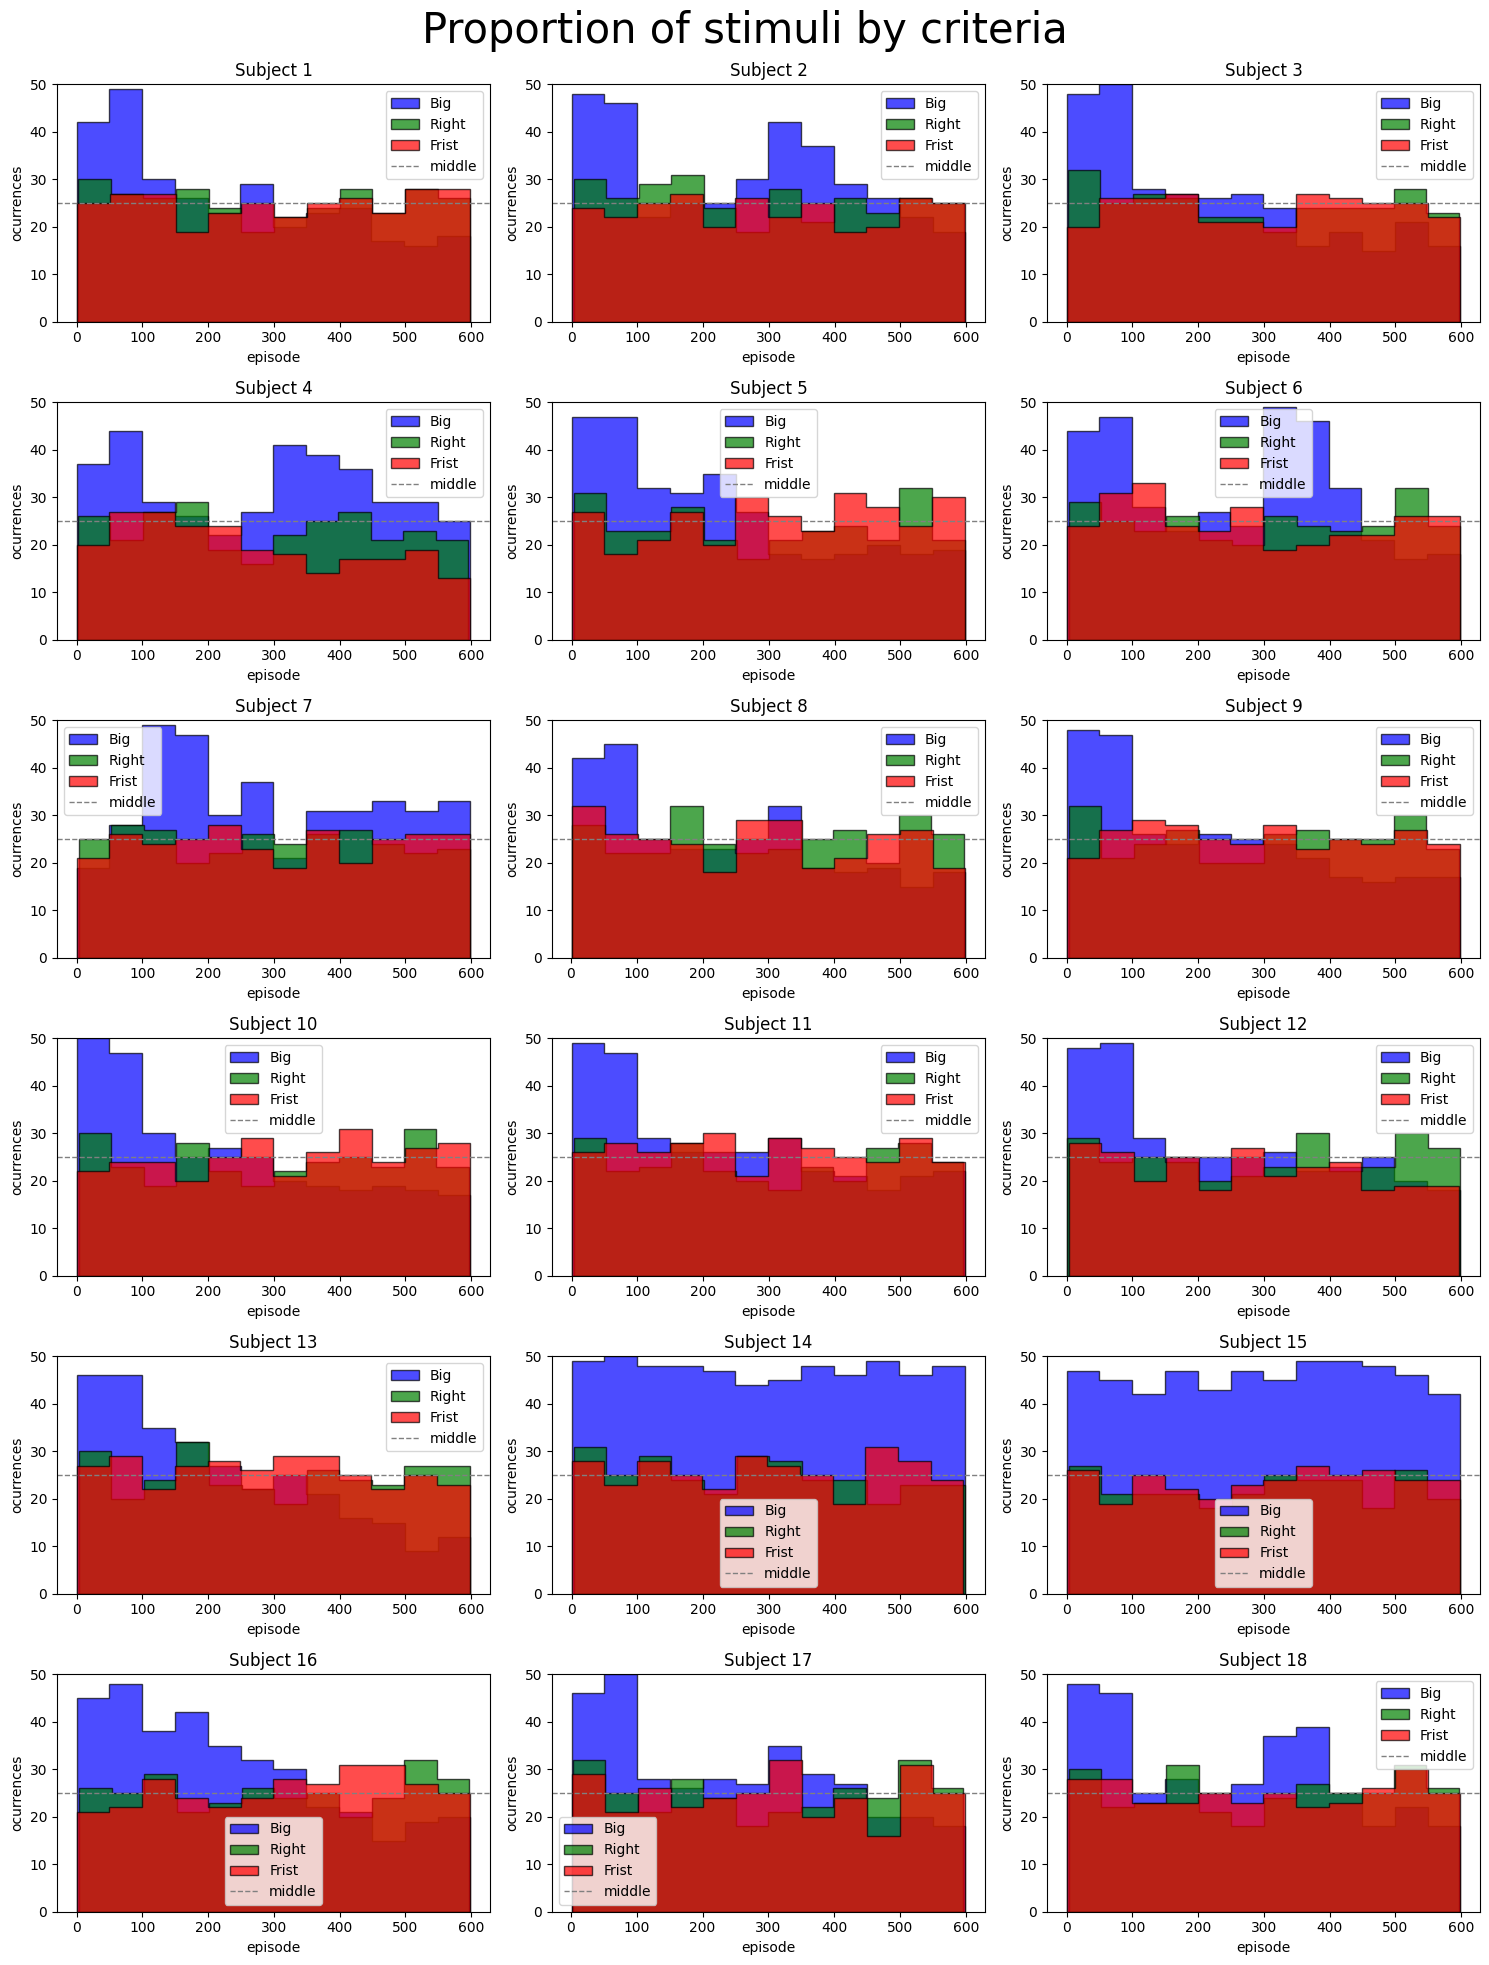

In [34]:

import matplotlib.pyplot as plt
import numpy as np
# Create the subplots
fig, axes = plt.subplots(6, 3, figsize=(15, 20))  # 6 rows and 3 columns
fig.suptitle("Proportion of stimuli by criteria", fontsize=30)
# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot the histograms
for i in range(18):
    s =df[(df["subject"] == i+1)].reset_index()
    axes[i].hist(s[s["big"]].index, bins=12, color='blue', edgecolor='black', histtype='stepfilled', alpha=0.7, label=f'Big')
    axes[i].hist(s[(s["right"])].index, bins=12, color='green', edgecolor='black', histtype='stepfilled', alpha=0.7, label=f'Right')
    axes[i].hist(s[(s["first"])].index, bins=12, color='red', edgecolor='black', histtype='stepfilled', alpha=0.7, label=f'Frist')
    axes[i].axhline(25, color='gray', linestyle='--', linewidth=1, label='middle')




    axes[i].set_title("Subject " + str(i+1))
    axes[i].set_ylim(0, 50)
    axes[i].set_ylabel("ocurrences")
    axes[i].set_xlabel("episode")
    axes[i].legend()

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.99])

# Show the plot
plt.show()

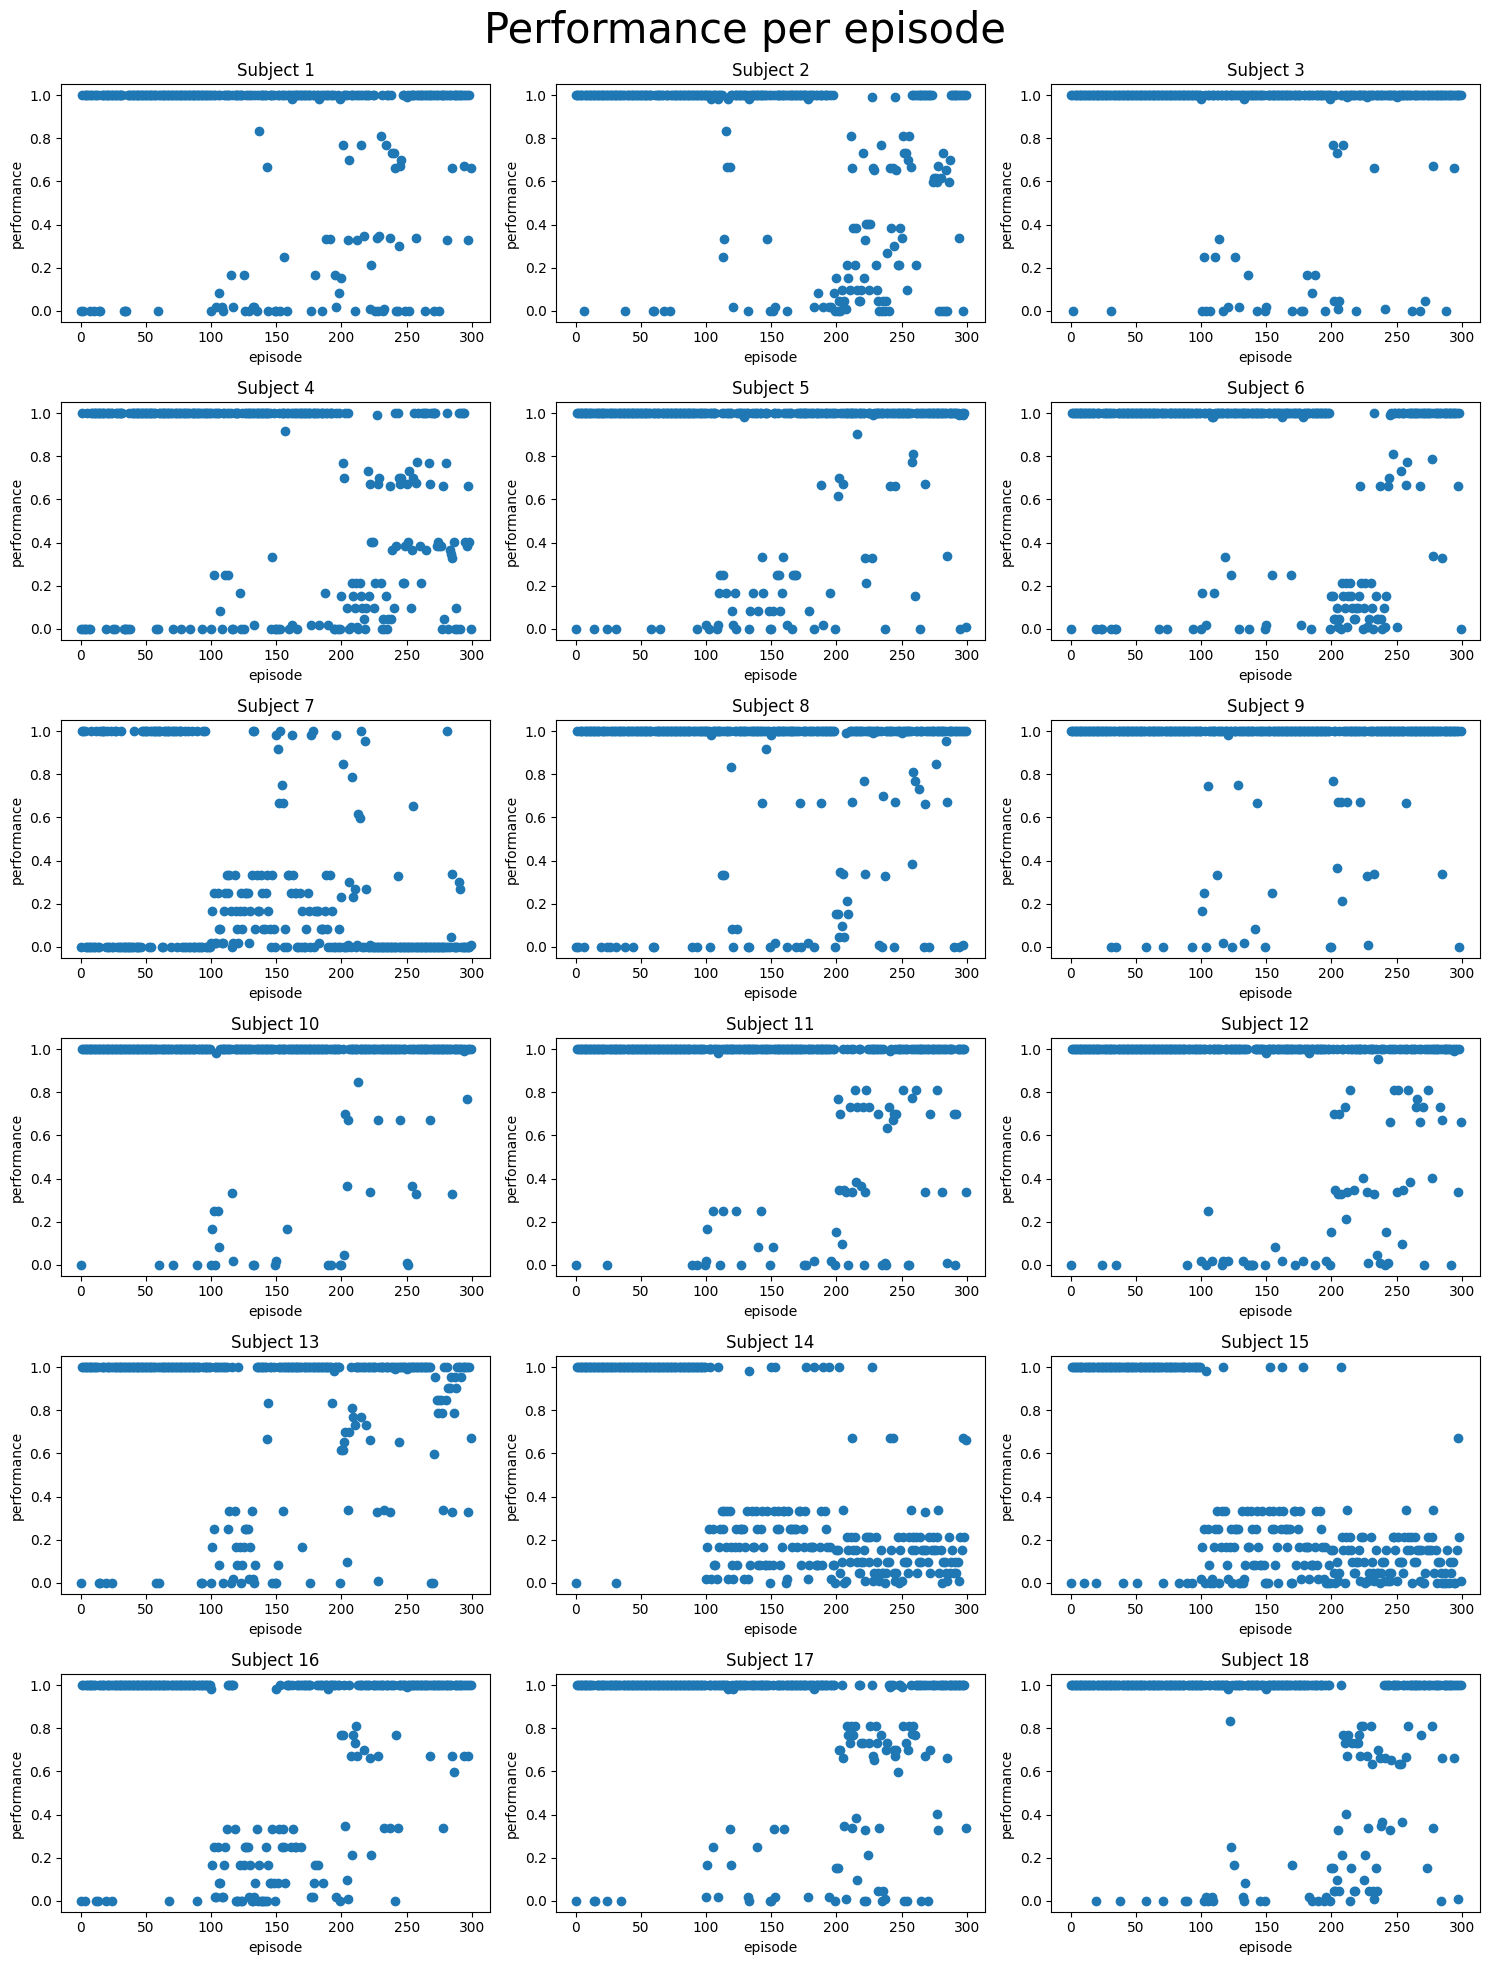

In [33]:
fig, axes = plt.subplots(6, 3, figsize=(15, 20))  # 6 rows and 3 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()
fig.suptitle("Performance per episode", fontsize=30)

# Plot the histograms
for i in range(18):
    data = df[(df["subject"] == i+1) & (df["nte"] == df["horizon"]+1)]["performance"]
    axes[i].scatter([range(len(data))], data)

    axes[i].set_xlabel("episode")
    axes[i].set_ylabel("performance")
    axes[i].set_title("Subject " + str(i+1))

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.99])

# Show the plot
plt.show()

/home/mpirla/Documentos/Uni/TFG/Entrega/utils/gaussian_smoothed_performance.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.isna()] = 0


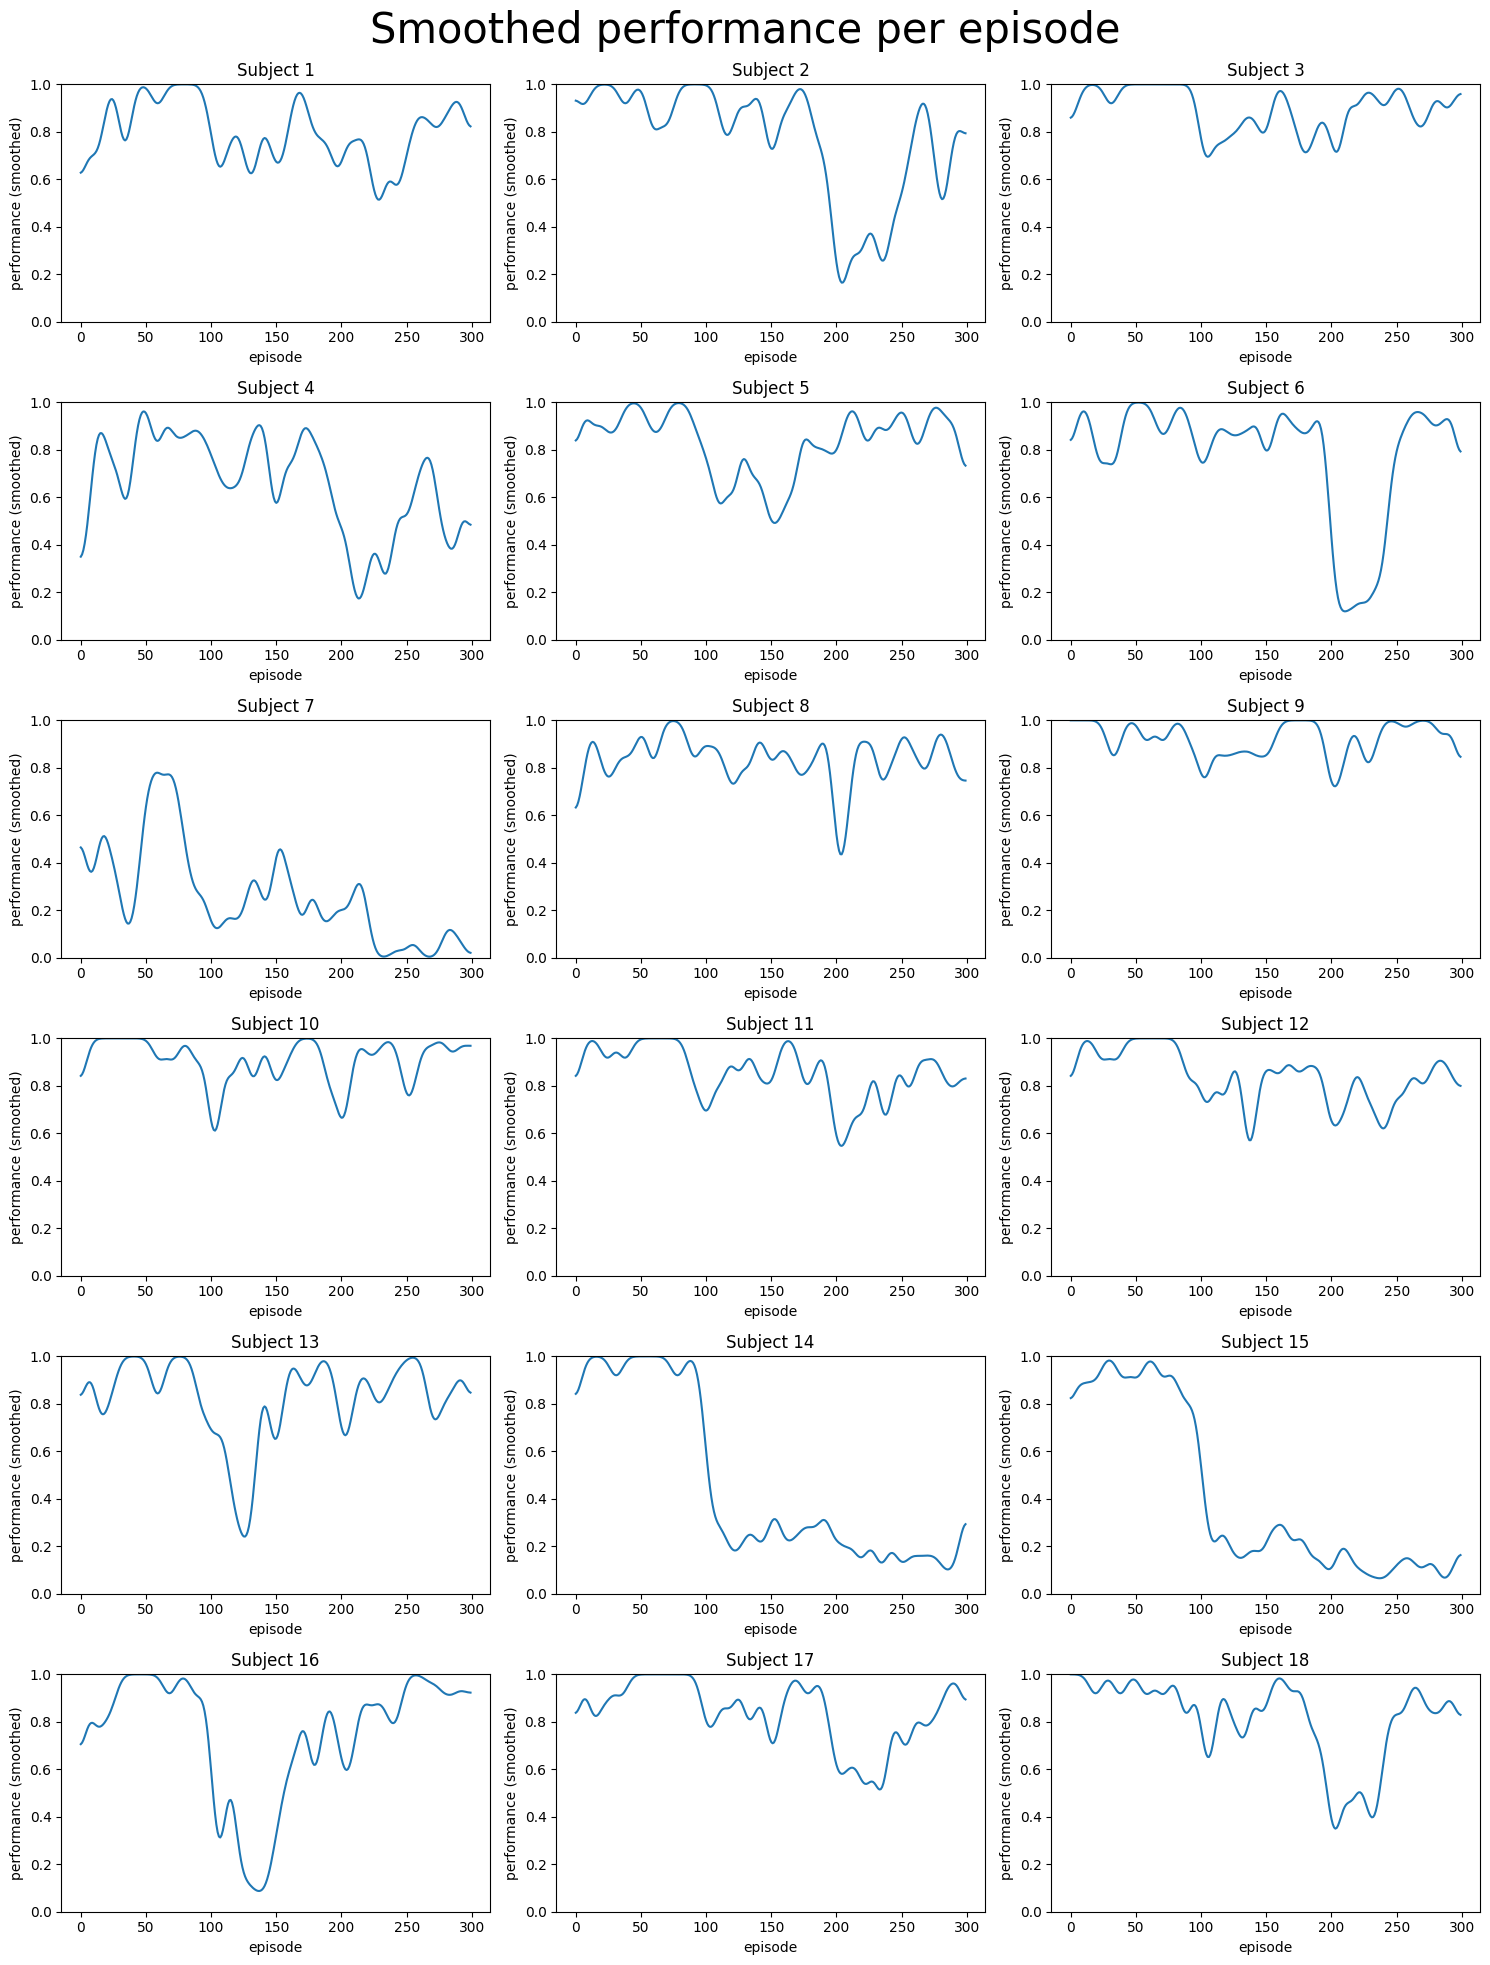

In [35]:
from utils.gaussian_smoothed_performance import *

fig, axes = plt.subplots(6, 3, figsize=(15, 20))  # 6 rows and 3 columns

# Flatten the axes array for easy iteration
axes = axes.flatten()
fig.suptitle("Smoothed performance per episode", fontsize=30)

# Plot the histograms
for i in range(18):
    axes[i].plot(make_performance_data(df, i+1))

    axes[i].set_xlabel("episode")
    axes[i].set_ylabel("performance (smoothed)")
    axes[i].set_title("Subject " + str(i+1))
    axes[i].set_ylim(0, 1)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.99])

# Show the plot
plt.show()

In [9]:
from utils.gaussian_smoothed_performance import *
difference_matrix = np.random.rand(18, 18)
for i in range(1, 19):
    data_s1 = df[(df["subject"] == i) & (df["nte"] == df["horizon"]+1)]["performance"]
    data_s1.loc[data_s1.isna()] = 0
    for j in range(1, 19):
        data_s2 = df[(df["subject"] == j) & (df["nte"] == df["horizon"]+1)]["performance"]
        data_s2.loc[data_s2.isna()] = 0
        difference_matrix[i-1][j-1] = calculate_euclidean_difference(list(data_s2), list(data_s1))
difference_matrix_smoothed = np.random.rand(18, 18)
for i in range(1, 19):
    data_s1 = make_performance_data(df, i)
    for j in range(1, 19):
        data_s2 = make_performance_data(df, j)
        difference_matrix_smoothed[i-1][j-1] = calculate_euclidean_difference(list(data_s2), list(data_s1))



/tmp/ipykernel_968317/2905172305.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s1.loc[data_s1.isna()] = 0
/tmp/ipykernel_968317/2905172305.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_s2.loc[data_s2.isna()] = 0
/home/mpirla/Documentos/Uni/TFG/Entrega/utils/gaussian_smoothed_performance.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.isna()] = 0


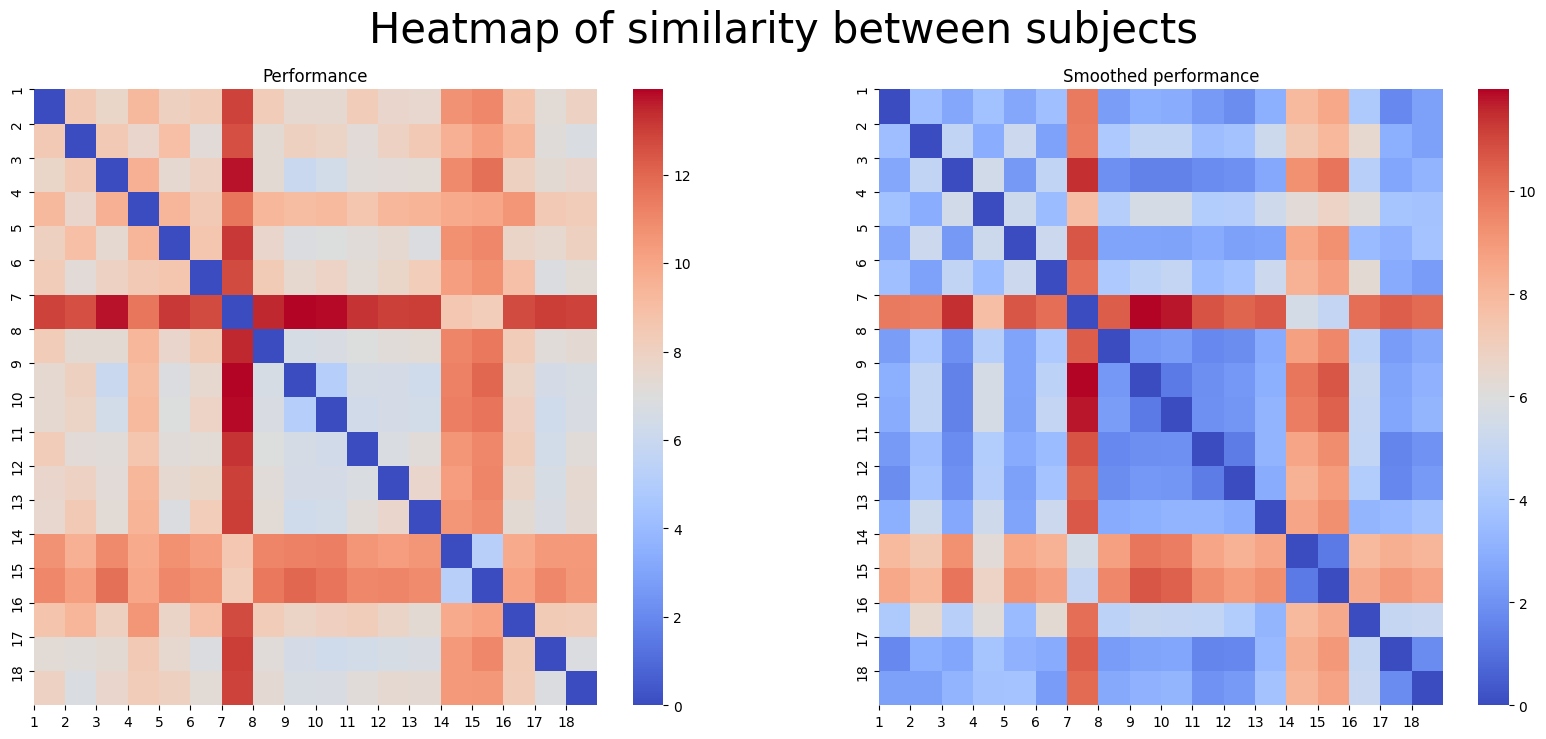

In [38]:
import seaborn as sns

difference_matrix

fig, axs = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle("Heatmap of similarity between subjects", fontsize=30)

sns.heatmap(difference_matrix, annot=False, cbar=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Performance')
labels = list(range(1, 19))
axs[0].set_xticks(ticks=np.arange(len(labels)), labels=labels)
axs[0].set_yticks(ticks=np.arange(len(labels)), labels=labels)


sns.heatmap(difference_matrix_smoothed, annot=False, cbar=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Smoothed performance')
labels = list(range(1, 19))
axs[1].set_xticks(ticks=np.arange(len(labels)), labels=labels)
axs[1].set_yticks(ticks=np.arange(len(labels)), labels=labels)
plt.show()
